## Observations and Insights 

1. The boxplots visually corroborate consistency in the data for the Drug Regimens of Capomulin, Ramicane, Infubinol and Ceftamin, with only one outlier in the Infubinol group.
2. The boxplots also demonstrate that mice in the group of Capomulin and Ramicane achieved a higher reduction in tumor volume compared to Infubinol and Ceftamin.
3. Data of mouse y793 shows a significant reduction of Tumor Volume for late Timepoints.
4. The scatter plot of Average Mouse Weight and Average Tumor Volume has a high correlation of 0.84, meaning that big mice developed higher tumors compared to small mice.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = mouse_metadata.merge(study_results, on = "Mouse ID", how = "inner")
# Display the data table for preview
merged_df = merged_df.set_index(["Mouse ID", "Timepoint"])
merged_df.head(20)

Drug Regimen     Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                                
k403     0             Ramicane    Male          21          16   
         5             Ramicane    Male          21          16   
         10            Ramicane    Male          21          16   
         15            Ramicane    Male          21          16   
         20            Ramicane    Male          21          16   
         25            Ramicane    Male          21          16   
         30            Ramicane    Male          21          16   
         35            Ramicane    Male          21          16   
         40            Ramicane    Male          21          16   
         45            Ramicane    Male          21          16   
s185     0            Capomulin  Female           3          17   
         5            Capomulin  Female           3          17   
         10           Capomulin  Female           3          17   
         15           Capomulin  Female           3          17   
         20           Capomulin  Female           3          17   
         25           Capomulin  Female           3          17   
         30           Capomulin  Female           3          17   
         35           Capomulin  Female           3          17   
         40           Capomulin  Female           3          17   
         45           Capomulin  Female           3          17   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
k403     0                   45.000000                 0  
         5                   38.825898                 0  
         10                  35.014271                 1  
         15                  34.223992                 1  
         20                  32.997729                 1  
         25                  33.464577                 1  
         30                  31.099498                 1  
         35                  26.546993                 1  
         40                  24.365505                 1  
         45                  22.050126                 1  
s185     0                   45.000000                 0  
         5                   43.878496                 0  
         10                  37.614948                 0  
         15                  38.177232                 0  
         20                  36.866876                 0  
         25                  33.949940                 0  
         30                  32.959671                 1  
         35                  28.328531                 1  
         40                  25.472143                 1  
         45                  23.343598                 1

In [2]:
# Checking the number of mice.
n_mouse = len(merged_df.groupby(["Mouse ID"]))
print(f"The number of mice is {n_mouse}.")

The number of mice is 249.


In [3]:
# Getting the duplicate mice by repeated ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse = merged_df.groupby(["Mouse ID", "Timepoint"]).count()
duplicate_mouse = duplicate_mouse["Drug Regimen"][duplicate_mouse["Drug Regimen"] > 1]
duplicate_mouse = duplicate_mouse.reset_index()
duplicate_mouse = duplicate_mouse["Mouse ID"][0]
print(f"The duplicate mouse is {duplicate_mouse}.")

The duplicate mouse is g989.


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_info = merged_df.loc[duplicate_mouse]
duplicate_mouse_info

Drug Regimen     Sex  Age_months  Weight (g)  Tumor Volume (mm3)  \
Timepoint                                                                    
0             Propriva  Female          21          26           45.000000   
0             Propriva  Female          21          26           45.000000   
5             Propriva  Female          21          26           48.786801   
5             Propriva  Female          21          26           47.570392   
10            Propriva  Female          21          26           51.745156   
10            Propriva  Female          21          26           49.880528   
15            Propriva  Female          21          26           51.325852   
15            Propriva  Female          21          26           53.442020   
20            Propriva  Female          21          26           55.326122   
20            Propriva  Female          21          26           54.657650   
25            Propriva  Female          21          26           56.045564   
30            Propriva  Female          21          26           59.082294   
35            Propriva  Female          21          26           62.570880   

           Metastatic Sites  
Timepoint                    
0                         0  
0                         0  
5                         0  
5                         0  
10                        0  
10                        0  
15                        1  
15                        0  
20                        1  
20                        1  
25                        1  
30                        1  
35                        2

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_df = merged_df.reset_index()
merged_df = merged_df.set_index("Mouse ID")
cleaned_df = merged_df.drop(index = duplicate_mouse)

cleaned_df = cleaned_df.reset_index()
cleaned_df = cleaned_df.set_index(["Mouse ID", "Timepoint"])

cleaned_df

Drug Regimen   Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
k403     0             Ramicane  Male          21          16   
         5             Ramicane  Male          21          16   
         10            Ramicane  Male          21          16   
         15            Ramicane  Male          21          16   
         20            Ramicane  Male          21          16   
...                         ...   ...         ...         ...   
z969     25            Naftisol  Male           9          30   
         30            Naftisol  Male           9          30   
         35            Naftisol  Male           9          30   
         40            Naftisol  Male           9          30   
         45            Naftisol  Male           9          30   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
k403     0                   45.000000                 0  
         5                   38.825898                 0  
         10                  35.014271                 1  
         15                  34.223992                 1  
         20                  32.997729                 1  
...                                ...               ...  
z969     25                  63.145652                 2  
         30                  65.841013                 3  
         35                  69.176246                 4  
         40                  70.314904                 4  
         45                  73.867845                 4  

[1880 rows x 6 columns]

In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_n_mouse = len(cleaned_df.groupby("Mouse ID").count())
print(f"The new number of mice is {cleaned_n_mouse}.")

The new number of mice is 248.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
cleaned_df = cleaned_df.reset_index()

# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean_DR = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_DR = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_DR = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_DR = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_DR = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_statistics1 = pd.DataFrame({
    "Mean": mean_DR,
    "Median": median_DR,
    "Variance": var_DR,
    "Standard Deviation": std_DR,
    "Standard Error of the Mean": sem_DR
})
summary_statistics1

Mean     Median   Variance  Standard Deviation  \
Drug Regimen                                                        
Capomulin     40.675741  41.557809  24.947764            4.994774   
Ceftamin      52.591172  51.776157  39.290177            6.268188   
Infubinol     52.884795  51.820584  43.128684            6.567243   
Ketapril      55.235638  53.698743  68.553577            8.279709   
Naftisol      54.331565  52.509285  66.173479            8.134708   
Placebo       54.033581  52.288934  61.168083            7.821003   
Propriva      52.320930  50.446266  43.852013            6.622085   
Ramicane      40.216745  40.673236  23.486704            4.846308   
Stelasyn      54.233149  52.431737  59.450562            7.710419   
Zoniferol     53.236507  51.818479  48.533355            6.966589   

              Standard Error of the Mean  
Drug Regimen                              
Capomulin                       0.329346  
Ceftamin                        0.469821  
Infubinol                       0.492236  
Ketapril                        0.603860  
Naftisol                        0.596466  
Placebo                         0.581331  
Propriva                        0.544332  
Ramicane                        0.320955  
Stelasyn                        0.573111  
Zoniferol                       0.516398

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

summary_statistics2 = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean = ("mean"),
    Median = ("median"),
    Variance = ("var"),
    Standard_Deviation = ("std"),
    Standard_Error_of_the_Mean = ("sem")
)

summary_statistics2

Mean     Median   Variance  Standard_Deviation  \
Drug Regimen                                                        
Capomulin     40.675741  41.557809  24.947764            4.994774   
Ceftamin      52.591172  51.776157  39.290177            6.268188   
Infubinol     52.884795  51.820584  43.128684            6.567243   
Ketapril      55.235638  53.698743  68.553577            8.279709   
Naftisol      54.331565  52.509285  66.173479            8.134708   
Placebo       54.033581  52.288934  61.168083            7.821003   
Propriva      52.320930  50.446266  43.852013            6.622085   
Ramicane      40.216745  40.673236  23.486704            4.846308   
Stelasyn      54.233149  52.431737  59.450562            7.710419   
Zoniferol     53.236507  51.818479  48.533355            6.966589   

              Standard_Error_of_the_Mean  
Drug Regimen                              
Capomulin                       0.329346  
Ceftamin                        0.469821  
Infubinol                       0.492236  
Ketapril                        0.603860  
Naftisol                        0.596466  
Placebo                         0.581331  
Propriva                        0.544332  
Ramicane                        0.320955  
Stelasyn                        0.573111  
Zoniferol                       0.516398

## Bar and Pie Charts

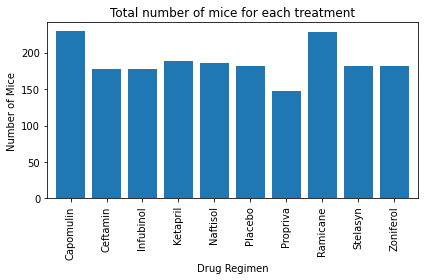

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
mice_vs_treatment = cleaned_df.groupby("Drug Regimen")["Mouse ID"].count()
# mice_vs_treatment
mice_vs_treatment.plot(kind = "bar", title = "Total number of mice for each treatment", ylabel = "Number of Mice", width=.8)
plt.tight_layout()
plt.show()


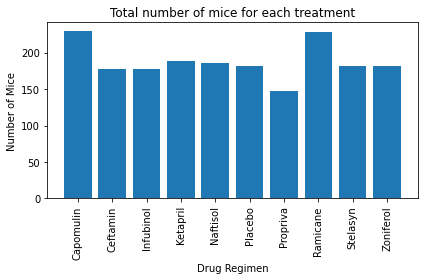

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
y_mice = mice_vs_treatment.to_numpy()
x_drugs = mice_vs_treatment.index
plt.bar(x_drugs, y_mice, width=0.8)
plt.xticks(rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Total number of mice for each treatment")
plt.tight_layout()
plt.show()

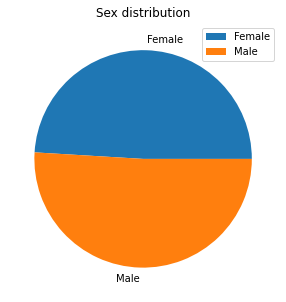

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_sex = cleaned_df.groupby("Sex").count()["Mouse ID"]
mice_sex.plot(kind = 'pie', title = "Sex distribution", ylabel = "", legend = True, figsize = (5, 5))
plt.show()

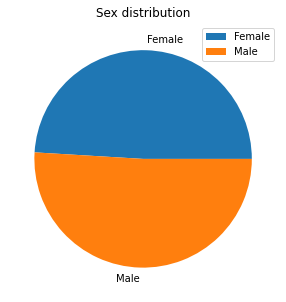

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
label_sex = mice_sex.index
size_sex = mice_sex.to_numpy()
plt.pie(size_sex, labels = label_sex)
plt.title("Sex distribution")
plt.legend()
fig0 = plt.gcf()
fig0.set_size_inches(5,5)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Creating a df that only contains the regimens of interest. 
filtered_df = cleaned_df[:][(cleaned_df["Drug Regimen"] == "Capomulin") | (cleaned_df["Drug Regimen"] == "Ramicane") | (cleaned_df["Drug Regimen"] == "Infubinol") | (cleaned_df["Drug Regimen"] == "Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = filtered_df.groupby("Mouse ID").last()

greatest_timepoint = greatest_timepoint.reset_index()
greatest_timepoint

Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0      a203         45    Infubinol  Female          20          23   
1      a251         45    Infubinol  Female          21          25   
2      a275         45     Ceftamin  Female          20          28   
3      a411         45     Ramicane    Male           3          22   
4      a444         45     Ramicane  Female          10          25   
..      ...        ...          ...     ...         ...         ...   
95     y769         45     Ceftamin  Female           6          27   
96     y793         45    Capomulin    Male          17          17   
97     y865         45     Ceftamin    Male          23          26   
98     z578         45     Ramicane    Male          11          16   
99     z581         45    Infubinol  Female          24          25   

    Tumor Volume (mm3)  Metastatic Sites  
0            67.973419                 2  
1            65.525743                 1  
2            62.999356                 3  
3            38.407618                 1  
4            43.047543                 0  
..                 ...               ...  
95           68.594745                 4  
96           31.896238                 2  
97           64.729837                 3  
98           30.638696                 0  
99           62.754451                 3  

[100 rows x 8 columns]

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# P: Grouping info of the last timepoint by drug regimen
grouped_drug = greatest_timepoint.groupby("Drug Regimen")

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Creating a list of lists to store tumor vol data of each regimen
for treatment in treatments:
    tumor_data.append(grouped_drug.get_group(str(treatment))["Tumor Volume (mm3)"])

# print(tumor_data)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
lowerq_list = []
lower_boundarie_list = []
upper_boundarie_list = []
upperq_list = []
iqr_list = []
possible_outliers =[]

# P: This part was done working with list of lists (similar to the above for)
for i, tumor_list in enumerate(tumor_data):
    
    # P: Calculating quartiles, lowerq, upperq and iqr as float variables
    quartiles = tumor_list.quantile([.25, .5, .75])
    
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_boundarie = lowerq - 1.5 * iqr
    upper_boundarie = upperq + 1.5 * iqr
    
    # P: Storing the float variables in the corresponding list of lists
    lowerq_list.append(lowerq)
    upperq_list.append(upperq)
    iqr_list.append(iqr)
    lower_boundarie_list.append(lower_boundarie)
    upper_boundarie_list.append(upper_boundarie)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    get_group_drug = grouped_drug.get_group(str(treatments[i]))
    
    # Determine outliers using upper and lower bounds
    possible_outliers.append(get_group_drug[(get_group_drug["Tumor Volume (mm3)"] <= lower_boundarie) | (get_group_drug["Tumor Volume (mm3)"] >= upper_boundarie)])

print(f"The following df displays possible outliers: \n\n\n{possible_outliers}\n\n\n It appears that only Infubinol has an outlier (mouse c326).")

The following df displays possible outliers: 


[Empty DataFrame
Columns: [Mouse ID, Timepoint, Drug Regimen, Sex, Age_months, Weight (g), Tumor Volume (mm3), Metastatic Sites]
Index: [], Empty DataFrame
Columns: [Mouse ID, Timepoint, Drug Regimen, Sex, Age_months, Weight (g), Tumor Volume (mm3), Metastatic Sites]
Index: [],    Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
15     c326          5    Infubinol  Female          18          25   

    Tumor Volume (mm3)  Metastatic Sites  
15           36.321346                 0  , Empty DataFrame
Columns: [Mouse ID, Timepoint, Drug Regimen, Sex, Age_months, Weight (g), Tumor Volume (mm3), Metastatic Sites]
Index: []]


 It appears that only Infubinol has an outlier (mouse c326).


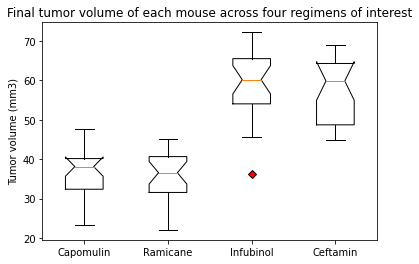

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot_df = greatest_timepoint[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]

# Option 1 to generate a box plot using 'subplot' and a for-loop
# for i, treatment in enumerate(treatments):
#     plt.subplot(2,2,i+1)
#     plt.boxplot(box_plot_df["Tumor Volume (mm3)"][box_plot_df["Drug Regimen"] == treatment])
#     plt.ylabel('Tumor Volume (mm3)')
#     plt.ylim(20,80)

# Option 2 to generate a box plot using 'subplots' and a for-loop
# fig2, axs = plt.subplots(2,2)
# for i, ax in enumerate(axs.flat):
#     ax.boxplot(box_plot_df["Tumor Volume (mm3)"][box_plot_df["Drug Regimen"] == treatments[i]])
#     ax.set(xlabel='', ylabel='Tumor Volume (mm3)', ylim = (20,80))
#     ax.label_outer()
#     fig2.suptitle("Final tumor volume")

# Option 3 to generate a box plot using 'subplots' only
red_diamond = dict(markerfacecolor='r', marker='D')    
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_data, notch = True, flierprops=red_diamond)
ax1.set_title("Final tumor volume of each mouse across four regimens of interest")
ax1.set_ylabel("Tumor volume (mm3)")
ax1.set(xticklabels=treatments)
plt.show()

## Line and Scatter Plots

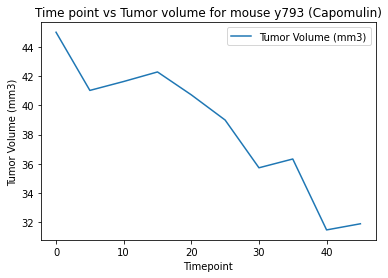

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_y793 = cleaned_df[["Timepoint", "Tumor Volume (mm3)"]][cleaned_df["Mouse ID"] == "y793"]
mouse_y793 = mouse_y793.set_index("Timepoint")
mouse_y793.plot.line(ylabel = "Tumor Volume (mm3)", title = "Time point vs Tumor volume for mouse y793 (Capomulin)")
plt.show()

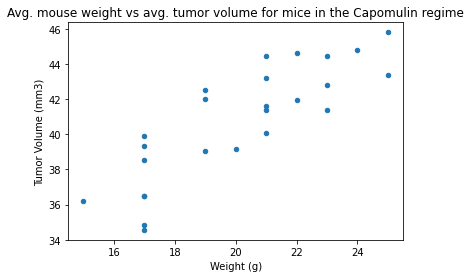

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# P: average mouse weight vs average tumor volume
capomulin_mice = cleaned_df[cleaned_df["Drug Regimen"] == "Capomulin"]
capomulin_mice = capomulin_mice.groupby("Mouse ID").mean()
capomulin_mice.plot.scatter(x = "Weight (g)", y = "Tumor Volume (mm3)", title = "Avg. mouse weight vs avg. tumor volume for mice in the Capomulin regime")
plt.show()

## Correlation and Regression

The correlation between both factors is r = 0.84
The linear regression model is y = 0.95x + 21.55


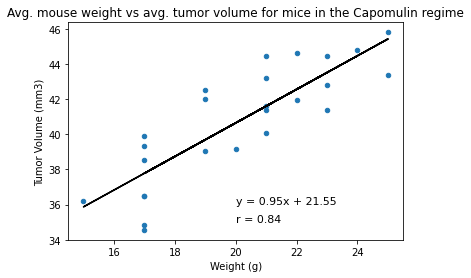

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Another option to calculate correlation using 'pearsonr'
# correlation = sts.pearsonr(capomulin_mice["Weight (g)"], capomulin_mice["Tumor Volume (mm3)"])

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(capomulin_mice["Weight (g)"], capomulin_mice["Tumor Volume (mm3)"])


regress_values = capomulin_mice["Weight (g)"] * slope + intercept
r_val = f"r = {round(rvalue,2)}"
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The correlation between both factors is {r_val}\nThe linear regression model is {line_eq}")

capomulin_mice.plot.scatter(x = "Weight (g)", y = "Tumor Volume (mm3)", title = "Avg. mouse weight vs avg. tumor volume for mice in the Capomulin regime")
plt.plot(capomulin_mice["Weight (g)"],regress_values,"k-")
plt.annotate(line_eq,(20,36),fontsize=11,color="k")
plt.annotate(r_val,(20,35),fontsize=11,color="k")
plt.show()

